# <font color=blue> Bank: Marketing </font>

A bank in Portugal was rolling out a new term deposits product for its existing customers. They wanted to understand which of their existing customers to call and target for this new product so that ROI would be high. In the past they had connected to their customer base through phone calls for various other products. Results for these previous campaigns had been made available for over 30,000 customers.

### Summary:

y(subscribed for deposit) is the dependant (target) variable. <br>

1 - age (numeric)<br>
2 - job : type of job (categorical: “admin.”,“unknown”,“unemployed”,“management”,“housemaid”,“entrepre neur”,“student”, “blue-collar”, “self-employed”,“retired”,“technician”, “services”)<br>
3 - marital : marital status (categorical: “married”,“divorced”,“single”; note: “divorced” means divorced or widowed)<br>
4 - education (categorical: “unknown”,“secondary”,“primary”,“tertiary”) <br>
5 - default: has credit in default? (binary: “yes”,“no”)<br>
6 - balance: average yearly balance, in euros (numeric)<br>
7 - housing: has housing loan? (binary: “yes”,“no”)<br>
8 - loan: has personal loan? (binary: “yes”,“no”)<br>
<br>
Related with the last contact of the current campaign:<br>
9 - contact: contact communication type (categorical: “unknown”,“telephone”,“cellular”)<br>
10 - day: last contact day of the month (numeric))<br>
<br>
Direct Marketing Campaign: Details and Phase I Tasks<br>
11 - month: last contact month of year (categorical: “jan”, “feb”, “mar”, . . . , “nov”, “dec”)<br>
12 - duration: last contact duration, in seconds (numeric)<br>
<br>
other attributes: <br>
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)<br>
15 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
16 - poutcome: outcome of the previous marketing campaign (categorical: “unknown”,“other”,“failure”,“success”)<br>



### **Solutioning : **

It's a binary clasiification problem. I am using 'randomForest' package.


### Resultes :
Accurecy of *~90%* on test data <br>
KS score of *~42%* on test data <br>
Precession of *~62%* on test data <br>
True Positive Rate of *~46%* on test data <br>

### Conclusion :
With Accurecy of 90% we can say most 

### <font color=green> ================================== Execution ==============================================</font>

## <font color=green>Summarizing Data</font>  

In [1]:
library(randomForest)
library(corrplot)
library(ggplot2)
library(gridExtra)
library(dplyr)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'ggplot2'

The following object is masked from 'package:randomForest':

    margin


Attaching package: 'gridExtra'

The following object is masked from 'package:randomForest':

    combine


Attaching package: 'dplyr'

The following object is masked from 'package:gridExtra':

    combine

The following object is masked from 'package:randomForest':

    combine

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
options(repr.plot.width=8, repr.plot.height=4)

In [3]:
setwd("H:/softwares/Data Analytics_Darshan/2. R.Introduction/Project/Project 5 Banking/P5_Banking")
getwd()

[1] "H:/softwares/Data Analytics_Darshan/2. R.Introduction/Project/Project 5 Banking/P5_Banking"

In [4]:
bank=read.csv("bank-full.csv",stringsAsFactors = F,na.strings = "unknown")
str(bank)

'data.frame':	31647 obs. of  18 variables:
 $ age      : int  45 34 40 58 59 36 34 38 52 48 ...
 $ job      : chr  "blue-collar" "admin." "technician" "self-employed" ...
 $ marital  : chr  "married" "divorced" "divorced" "married" ...
 $ education: chr  "secondary" "secondary" "secondary" "tertiary" ...
 $ default  : chr  "no" "no" "no" "no" ...
 $ balance  : int  2 0 311 5810 169 24 -868 -140 98 1203 ...
 $ housing  : chr  "no" "no" "no" "no" ...
 $ loan     : chr  "no" "no" "no" "no" ...
 $ contact  : chr  "cellular" "cellular" "cellular" "cellular" ...
 $ day      : int  26 10 6 12 16 11 30 25 28 6 ...
 $ month    : chr  "aug" "jul" "aug" "mar" ...
 $ duration : int  105 268 738 139 181 100 198 456 103 61 ...
 $ campaign : int  10 1 2 1 3 5 2 3 1 5 ...
 $ pdays    : int  -1 -1 -1 -1 -1 -1 -1 -1 245 -1 ...
 $ previous : int  0 0 0 0 0 0 0 0 2 0 ...
 $ poutcome : chr  NA NA NA NA ...
 $ ID       : int  22944 13870 19301 31334 3849 10192 12411 12310 27838 19423 ...
 $ y        : chr  

In [5]:
summary(bank)

      age            job              marital           education        
 Min.   :18.00   Length:31647       Length:31647       Length:31647      
 1st Qu.:33.00   Class :character   Class :character   Class :character  
 Median :39.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :40.91                                                           
 3rd Qu.:48.00                                                           
 Max.   :95.00                                                           
   default             balance         housing              loan          
 Length:31647       Min.   : -8019   Length:31647       Length:31647      
 Class :character   1st Qu.:    72   Class :character   Class :character  
 Mode  :character   Median :   445   Mode  :character   Mode  :character  
                    Mean   :  1348                                        
                    3rd Qu.:  1414                                        
                    Max.   :1021

In [6]:
colSums(is.na(bank))

age       job   marital education   default   balance   housing      loan 
        0       211         0      1308         0         0         0         0 
  contact       day     month  duration  campaign     pdays  previous  poutcome 
     9129         0         0         0         0         0         0     25899 
       ID         y 
        0         0

In [7]:
bank$poutcome=NULL
bank$ID=NULL

## <font color=green> Data Visualization </font>

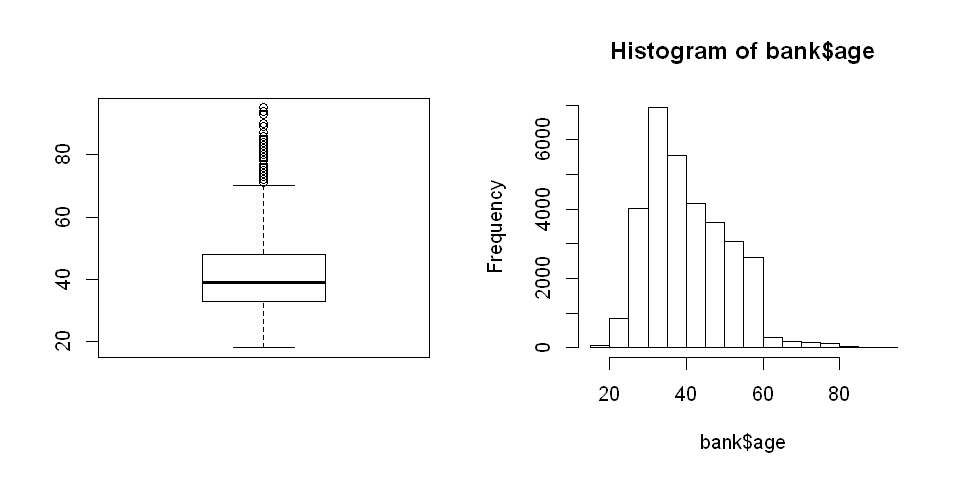

In [8]:
par(mfcol=c(1,2))
boxplot(bank$age)
hist(bank$age)

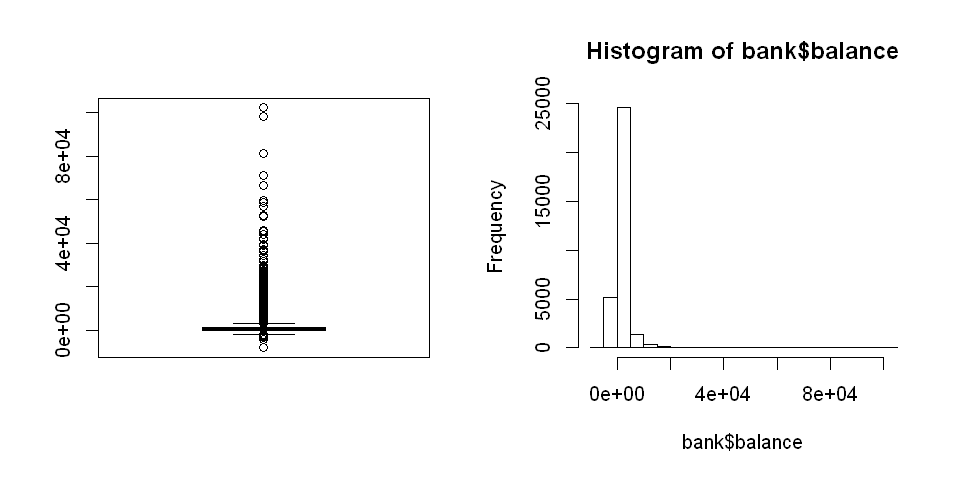

In [9]:
par(mfcol=c(1,2))
boxplot(bank$balance)
hist(bank$balance)

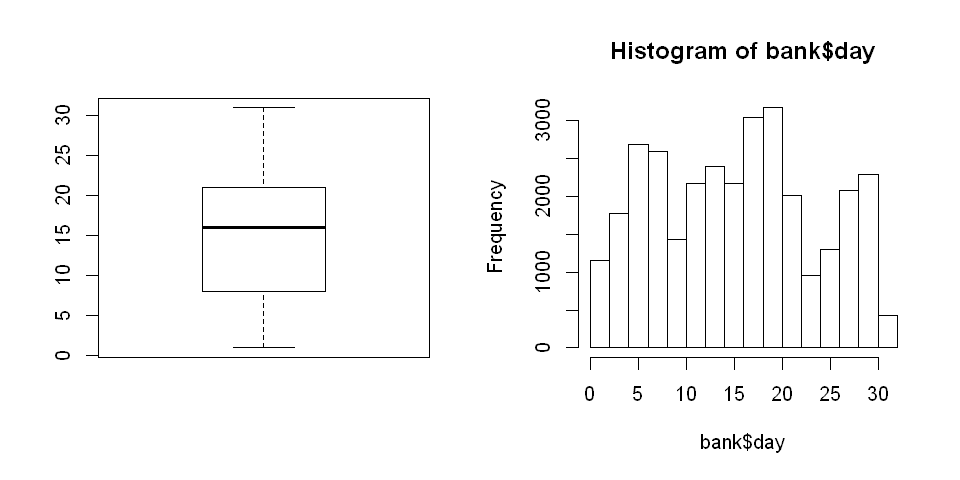

In [10]:
par(mfcol=c(1,2))
boxplot(bank$day)
hist(bank$day)

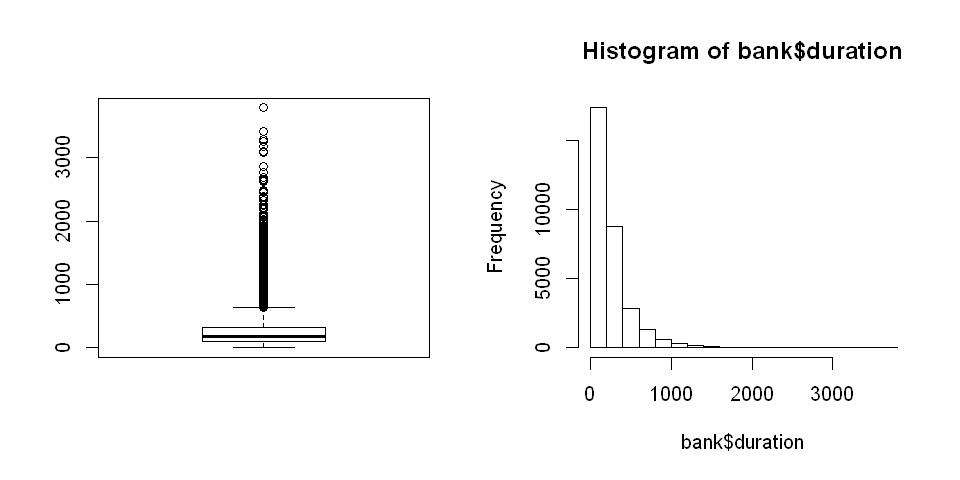

In [11]:
par(mfcol=c(1,2))
boxplot(bank$duration)
hist(bank$duration)

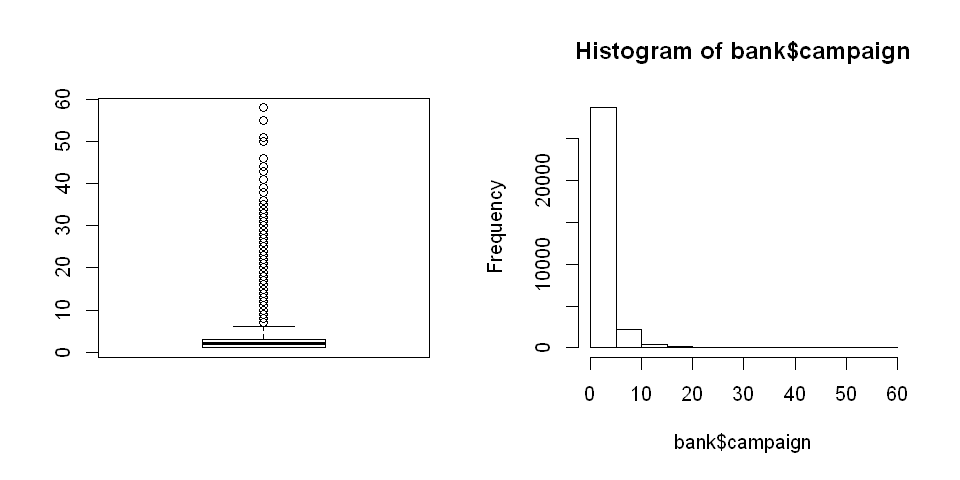

In [12]:
par(mfcol=c(1,2))
boxplot(bank$campaign)
hist(bank$campaign)

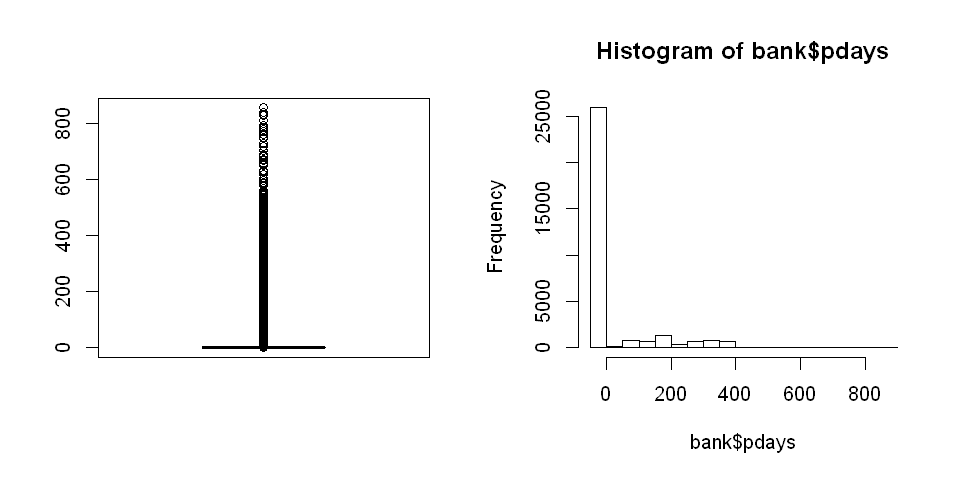

In [13]:
par(mfcol=c(1,2))
boxplot(bank$pdays)
hist(bank$pdays)

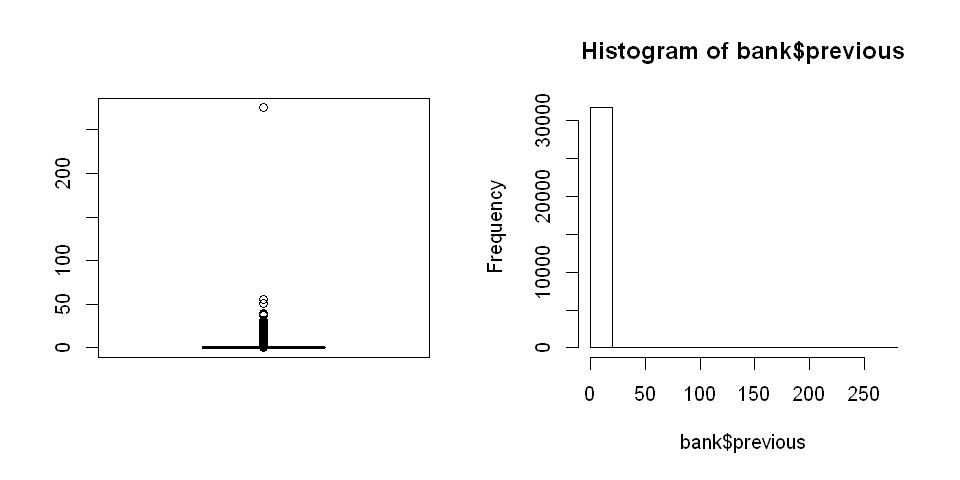

In [14]:
par(mfcol=c(1,2))
boxplot(bank$previous)
hist(bank$previous)

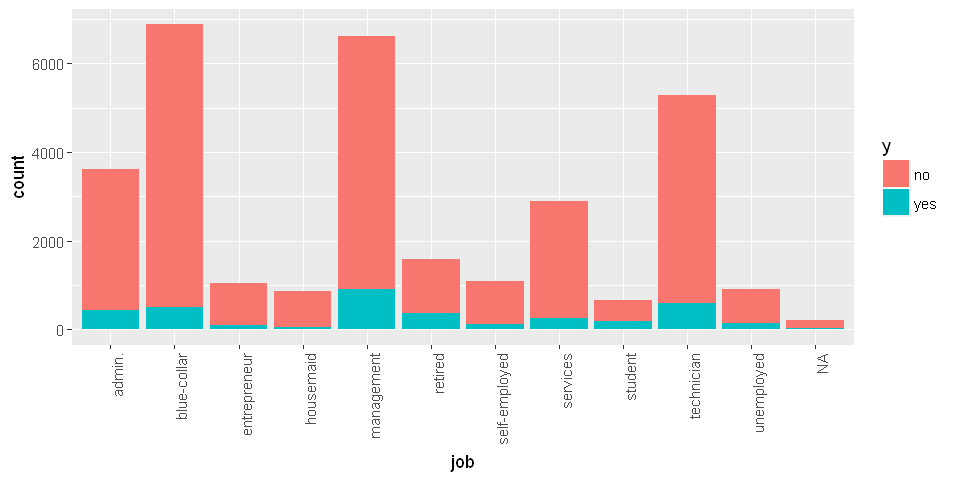

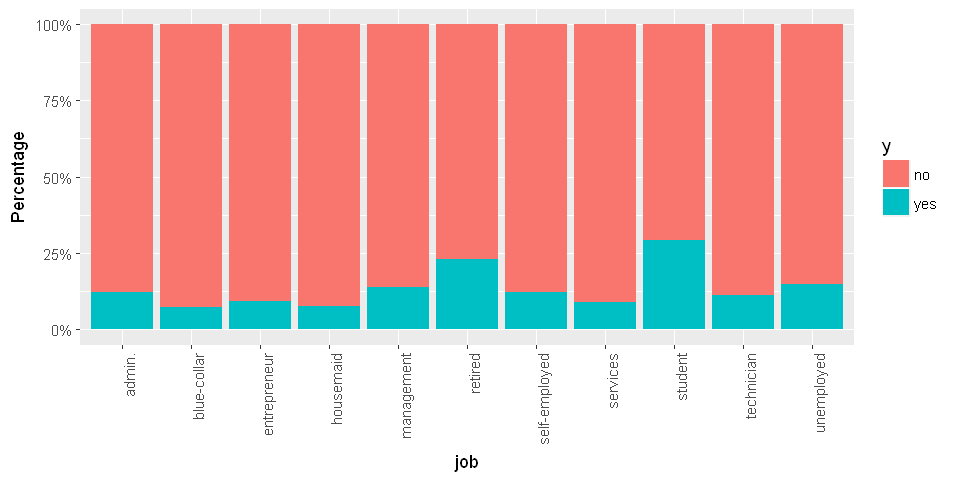

In [15]:
plot1=ggplot(bank,aes(job,fill=y))+geom_bar()+theme(axis.text.x = element_text(angle = 90, hjust = 1))

mydf <- data.frame(prop.table(table(bank$job, bank$y),1))
names(mydf)=c("job","y","Percentage")

plot2=ggplot(mydf, aes(job, Percentage, fill = y)) + 
  geom_bar(position = "stack", stat = "identity") +
  scale_y_continuous(labels=scales::percent)+
theme(axis.text.x = element_text(angle = 90, hjust = 1))
plot1
plot2

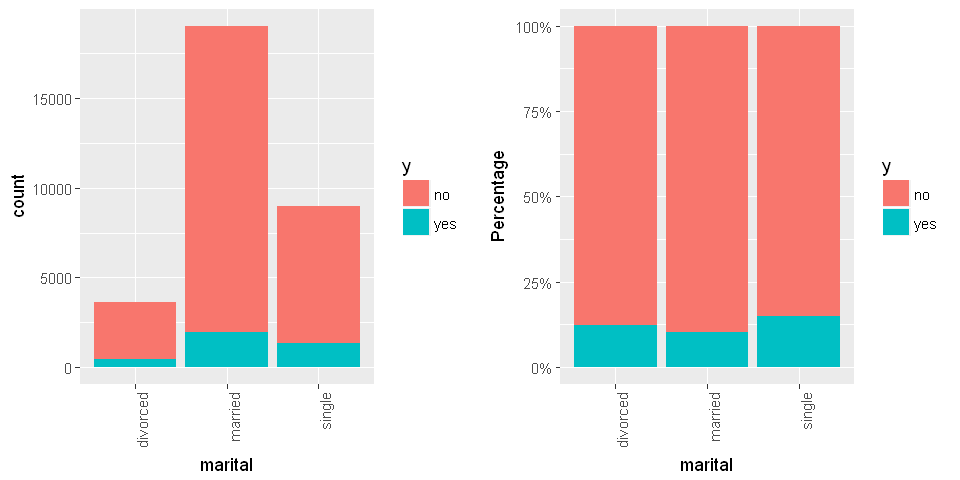

In [16]:
plot1=ggplot(bank,aes(marital,fill=y))+geom_bar()+theme(axis.text.x = element_text(angle = 90, hjust = 1))

mydf <- data.frame(prop.table(table(bank$marital, bank$y),1))
names(mydf)=c("marital","y","Percentage")

plot2=ggplot(mydf, aes(marital, Percentage, fill = y)) + 
  geom_bar(position = "stack", stat = "identity") +
  scale_y_continuous(labels=scales::percent)+
theme(axis.text.x = element_text(angle = 90, hjust = 1))

grid.arrange(plot1, plot2, ncol=2)

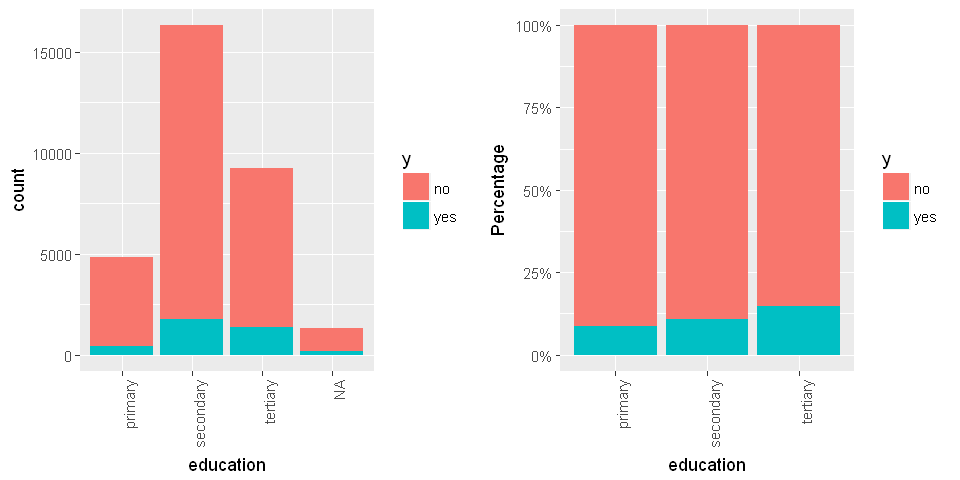

In [17]:
plot1=ggplot(bank,aes(education,fill=y))+geom_bar()+theme(axis.text.x = element_text(angle = 90, hjust = 1))

mydf <- data.frame(prop.table(table(bank$education, bank$y),1))
names(mydf)=c("education","y","Percentage")

plot2=ggplot(mydf, aes(education, Percentage, fill = y)) + 
  geom_bar(position = "stack", stat = "identity") +
  scale_y_continuous(labels=scales::percent)+
theme(axis.text.x = element_text(angle = 90, hjust = 1))

grid.arrange(plot1, plot2, ncol=2)

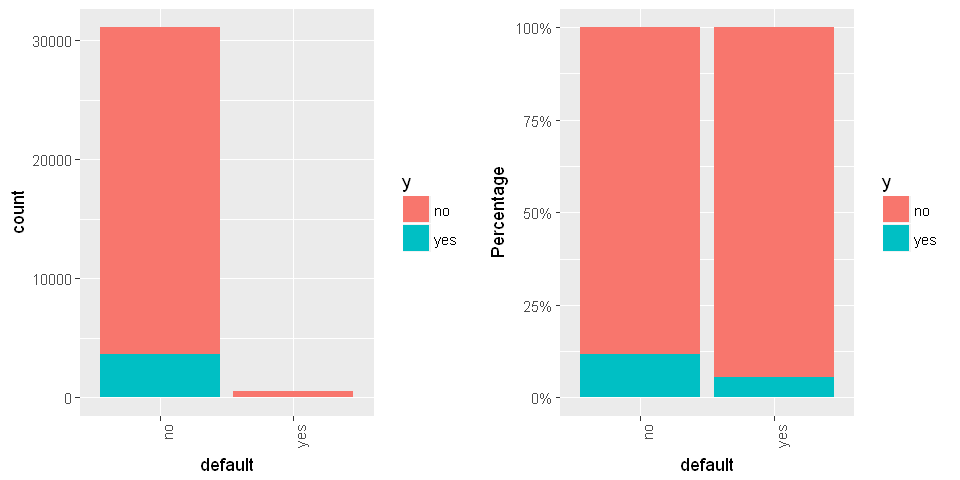

In [18]:
plot1=ggplot(bank,aes(default,fill=y))+geom_bar()+theme(axis.text.x = element_text(angle = 90, hjust = 1))

mydf <- data.frame(prop.table(table(bank$default, bank$y),1))
names(mydf)=c("default","y","Percentage")

plot2=ggplot(mydf, aes(default, Percentage, fill = y)) + 
  geom_bar(position = "stack", stat = "identity") +
  scale_y_continuous(labels=scales::percent)+
theme(axis.text.x = element_text(angle = 90, hjust = 1))

grid.arrange(plot1, plot2, ncol=2)

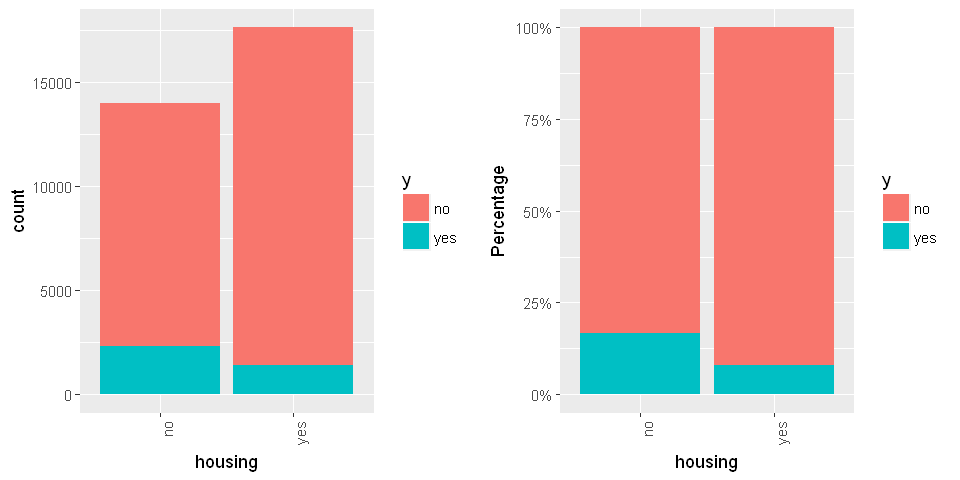

In [19]:
plot1=ggplot(bank,aes(housing,fill=y))+geom_bar()+theme(axis.text.x = element_text(angle = 90, hjust = 1))

mydf <- data.frame(prop.table(table(bank$housing, bank$y),1))
names(mydf)=c("housing","y","Percentage")

plot2=ggplot(mydf, aes(housing, Percentage, fill = y)) + 
  geom_bar(position = "stack", stat = "identity") +
  scale_y_continuous(labels=scales::percent)+
theme(axis.text.x = element_text(angle = 90, hjust = 1))

grid.arrange(plot1, plot2, ncol=2)

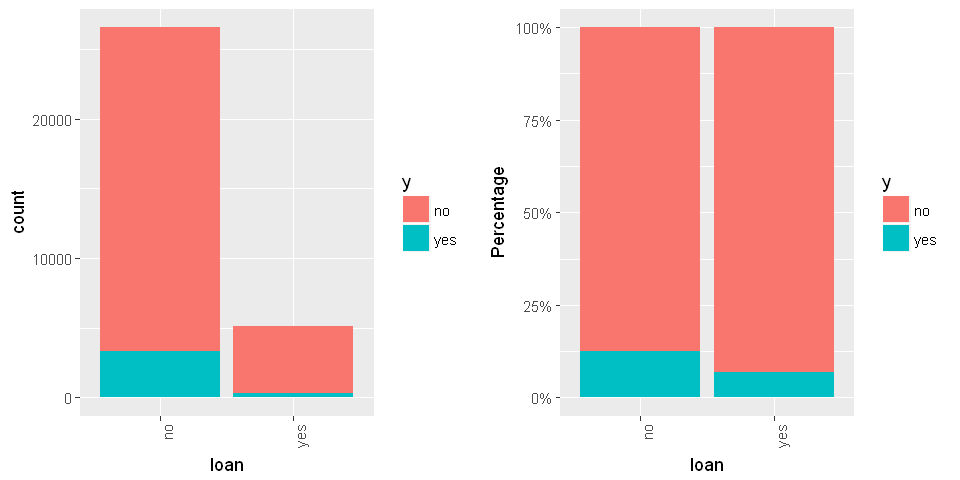

In [20]:
plot1=ggplot(bank,aes(loan,fill=y))+geom_bar()+theme(axis.text.x = element_text(angle = 90, hjust = 1))

mydf <- data.frame(prop.table(table(bank$loan, bank$y),1))
names(mydf)=c("loan","y","Percentage")

plot2=ggplot(mydf, aes(loan, Percentage, fill = y)) + 
  geom_bar(position = "stack", stat = "identity") +
  scale_y_continuous(labels=scales::percent)+
theme(axis.text.x = element_text(angle = 90, hjust = 1))

grid.arrange(plot1, plot2, ncol=2)

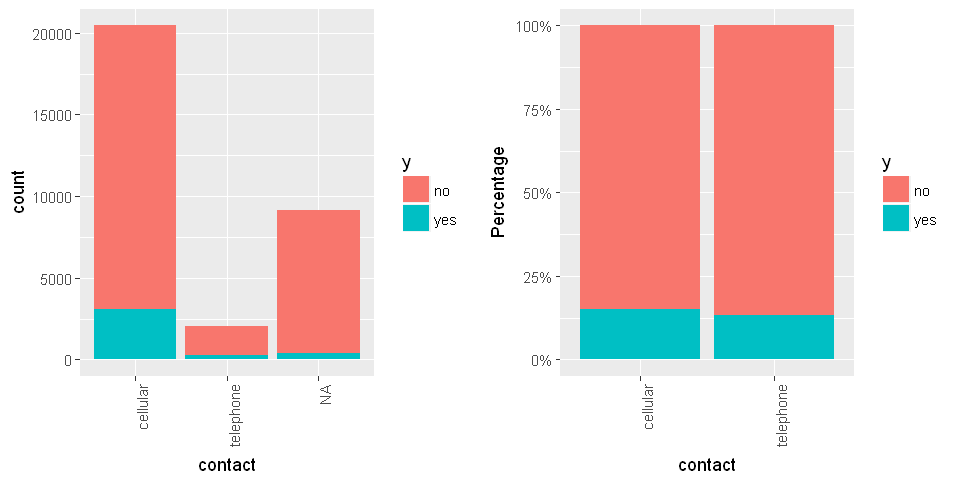

In [21]:
plot1=ggplot(bank,aes(contact,fill=y))+geom_bar()+theme(axis.text.x = element_text(angle = 90, hjust = 1))

mydf <- data.frame(prop.table(table(bank$contact, bank$y),1))
names(mydf)=c("contact","y","Percentage")

plot2=ggplot(mydf, aes(contact, Percentage, fill = y)) + 
  geom_bar(position = "stack", stat = "identity") +
  scale_y_continuous(labels=scales::percent)+
theme(axis.text.x = element_text(angle = 90, hjust = 1))

grid.arrange(plot1, plot2, ncol=2)

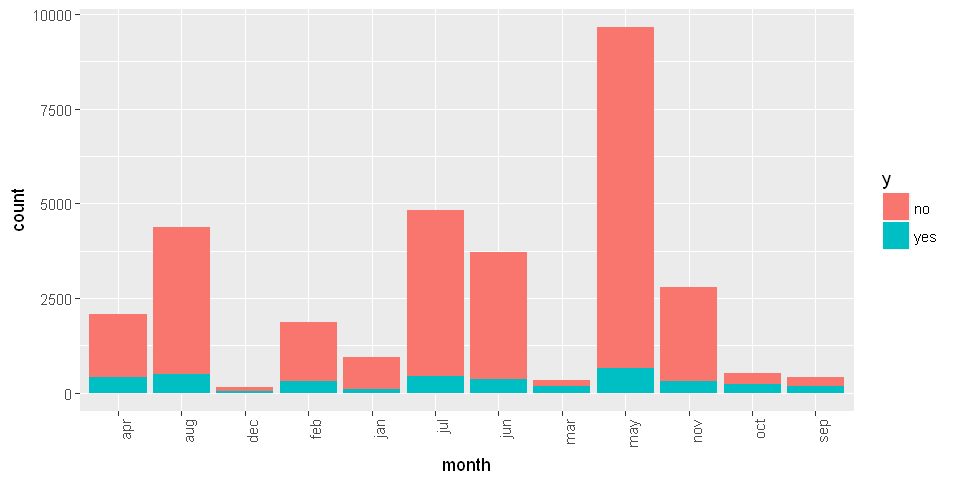

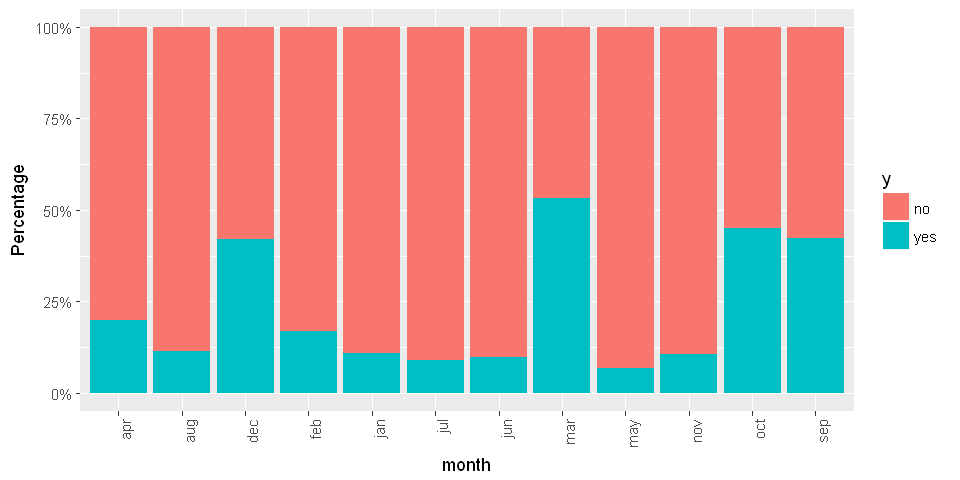

In [22]:
plot1=ggplot(bank,aes(month,fill=y))+geom_bar()+theme(axis.text.x = element_text(angle = 90, hjust = 1))

mydf <- data.frame(prop.table(table(bank$month, bank$y),1))
names(mydf)=c("month","y","Percentage")

plot2=ggplot(mydf, aes(month, Percentage, fill = y)) + 
  geom_bar(position = "stack", stat = "identity") +
  scale_y_continuous(labels=scales::percent)+
theme(axis.text.x = element_text(angle = 90, hjust = 1))

plot1
plot2

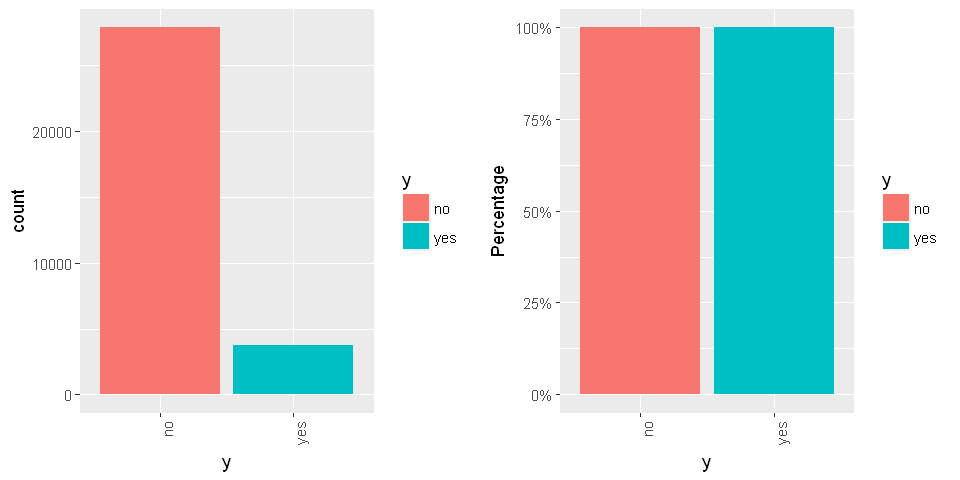

In [23]:
plot1=ggplot(bank,aes(y,fill=y))+geom_bar()+theme(axis.text.x = element_text(angle = 90, hjust = 1))

mydf <- data.frame(prop.table(table(bank$y),1))
names(mydf)=c("y","Percentage")

plot2=ggplot(mydf, aes(y, Percentage, fill = y)) + 
  geom_bar(position = "stack", stat = "identity") +
  scale_y_continuous(labels=scales::percent)+
theme(axis.text.x = element_text(angle = 90, hjust = 1))

grid.arrange(plot1, plot2, ncol=2)

In [24]:
str(bank)

'data.frame':	31647 obs. of  16 variables:
 $ age      : int  45 34 40 58 59 36 34 38 52 48 ...
 $ job      : chr  "blue-collar" "admin." "technician" "self-employed" ...
 $ marital  : chr  "married" "divorced" "divorced" "married" ...
 $ education: chr  "secondary" "secondary" "secondary" "tertiary" ...
 $ default  : chr  "no" "no" "no" "no" ...
 $ balance  : int  2 0 311 5810 169 24 -868 -140 98 1203 ...
 $ housing  : chr  "no" "no" "no" "no" ...
 $ loan     : chr  "no" "no" "no" "no" ...
 $ contact  : chr  "cellular" "cellular" "cellular" "cellular" ...
 $ day      : int  26 10 6 12 16 11 30 25 28 6 ...
 $ month    : chr  "aug" "jul" "aug" "mar" ...
 $ duration : int  105 268 738 139 181 100 198 456 103 61 ...
 $ campaign : int  10 1 2 1 3 5 2 3 1 5 ...
 $ pdays    : int  -1 -1 -1 -1 -1 -1 -1 -1 245 -1 ...
 $ previous : int  0 0 0 0 0 0 0 0 2 0 ...
 $ y        : chr  "no" "no" "yes" "yes" ...


In [25]:
bank_cor=bank  %>% select(-job,-marital ,-education,-contact,-month)

In [26]:
table(bank_cor$default)
bank_cor$default=ifelse(bank_cor$default=="yes",1,0)


   no   yes 
31090   557 

In [27]:
table(bank_cor$housing)
bank_cor$housing=ifelse(bank_cor$housing=="yes",1,0)


   no   yes 
14007 17640 

In [28]:
table(bank_cor$loan)
bank_cor$loan=ifelse(bank_cor$loan=="yes",1,0)


   no   yes 
26550  5097 

In [29]:
table(bank_cor$y)
bank_cor$y=ifelse(bank_cor$y=="yes",1,0)


   no   yes 
27927  3720 

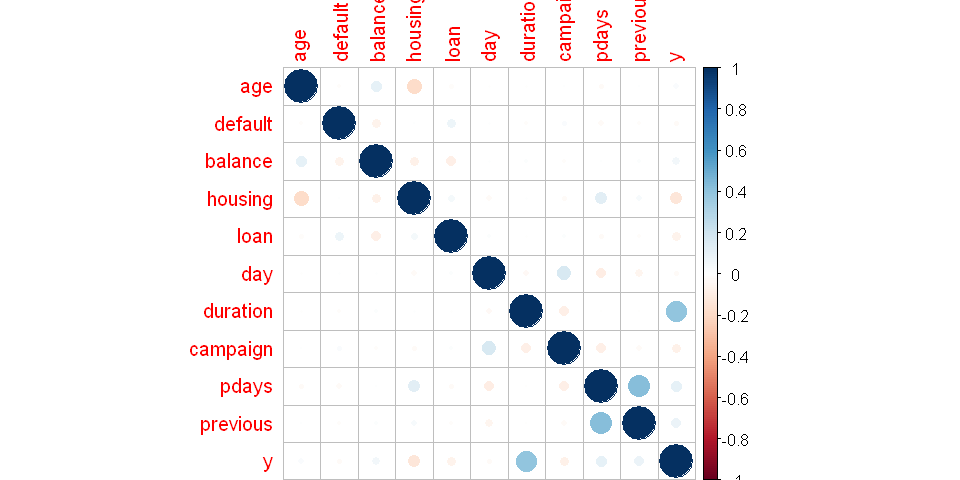

In [30]:
corrplot(cor(bank_cor))

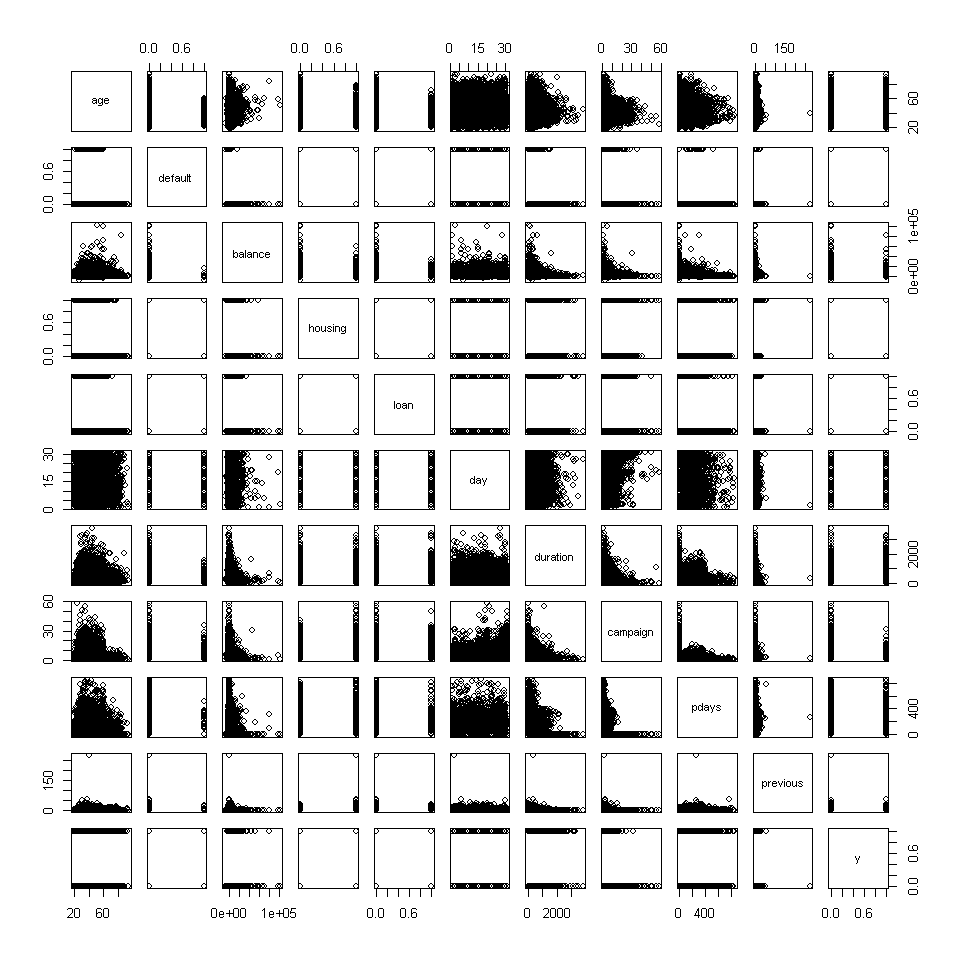

In [31]:
options(repr.plot.width=8, repr.plot.height=8)
pairs(bank_cor)

In [32]:
options(repr.plot.width=8, repr.plot.height=4)

##  <font color=green>Data Preparation</font>  

In [33]:
table(bank$job)


       admin.   blue-collar  entrepreneur     housemaid    management 
         3625          6884          1051           855          6616 
      retired self-employed      services       student    technician 
         1587          1090          2888           660          5278 
   unemployed 
          902 

In [34]:
bank$job=gsub("[[:punct:]]" , "", bank$job)

In [35]:
bank[is.na(bank$job),"job"] = "NAJob"    

In [36]:
bank[ is.na(bank$education) & bank$job%in%c("bluecollar","admin","management","retired"),"education"] ="tertiary"
bank[ is.na(bank$education) & bank$job%in%c("technician","selfemployed","services"),"education"] ="secondary"
bank[ is.na(bank$education) ,"education"] ="primary"

In [37]:
bank[ is.na(bank$contact) ,"contact"] = "cellular"

In [38]:
for(i in 1 : ncol(bank)){
if(class(bank[,i])=="character"){
  bank[,i]=as.factor(bank[,i])

}else{}

}

In [39]:
colSums(is.na(bank))

age       job   marital education   default   balance   housing      loan 
        0         0         0         0         0         0         0         0 
  contact       day     month  duration  campaign     pdays  previous         y 
        0         0         0         0         0         0         0         0

##  <font color=green>Modling</font>  

In [40]:
set.seed(2)
a=sample(1:nrow(bank),nrow(bank)*0.75)

bank_train =bank[a,]
bank_test =bank[-a,]

In [95]:
set.seed(2)
fit_rf=randomForest(y~.,data=bank_train,ntree=200,mtry=6)

In [96]:
fit_rf


Call:
 randomForest(formula = y ~ ., data = bank_train, ntree = 200,      mtry = 6) 
               Type of random forest: classification
                     Number of trees: 200
No. of variables tried at each split: 6

        OOB estimate of  error rate: 10.05%
Confusion matrix:
       no  yes class.error
no  20083  888  0.04234419
yes  1498 1266  0.54196816

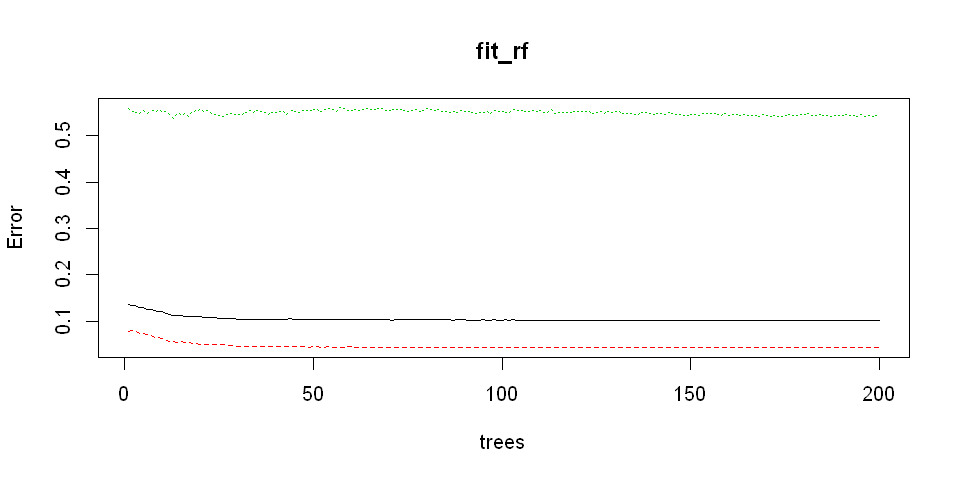

In [107]:
plot(fit_rf)

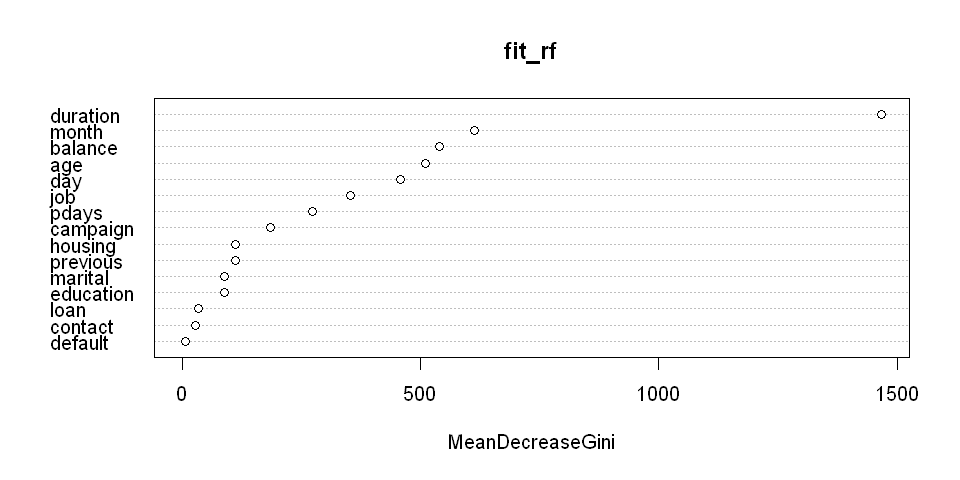

In [97]:
varImpPlot(fit_rf)

In [105]:
set.seed(2)
pre=predict(fit_rf,bank_train)

a=table(bank_train$y,pre)
a
TPR=a[2,2]/ sum(a[2,])
FPR=a[1,2]/ sum(a[1,])
KS=TPR-FPR
print("KS Score:" )
KS
print("Accurecy Score:" )
(a[2,2]+a[1,1])/(sum(a))

     pre
         no   yes
  no  20971     0
  yes     0  2764

[1] "KS Score:"


[1] 1

[1] "Accurecy Score:"


[1] 1

In [106]:
set.seed(2)
pre=predict(fit_rf,bank_test)

a=table(bank_test$y,pre)
a
TPR=a[2,2]/ sum(a[2,])
FPR=a[1,2]/ sum(a[1,])
KS=TPR-FPR
print("KS Score:" )
KS
print("Accurecy Score:" )
(a[2,2]+a[1,1])/(sum(a))

     pre
        no  yes
  no  6687  269
  yes  512  444

[1] "KS Score:"


[1] 0.4257635

[1] "Accurecy Score:"


[1] 0.9012892

### Removing less important variables
loan, marital, education, housing, previous, campaign

In [110]:
set.seed(2)
fit_rf=randomForest(y~duration+month+balance+age+day+job+pdays,data=bank_train,ntree=200,mtry=3)

In [111]:
fit_rf


Call:
 randomForest(formula = y ~ duration + month + balance + age +      day + job + pdays, data = bank_train, ntree = 200, mtry = 3) 
               Type of random forest: classification
                     Number of trees: 200
No. of variables tried at each split: 3

        OOB estimate of  error rate: 10.24%
Confusion matrix:
       no  yes class.error
no  20098  873  0.04162892
yes  1558 1206  0.56367583

In [112]:
set.seed(2)
pre=predict(fit_rf,bank_train)

a=table(bank_train$y,pre)
a
TPR=a[2,2]/ sum(a[2,])
FPR=a[1,2]/ sum(a[1,])
KS=TPR-FPR
print("KS Score:" )
KS
print("Accurecy Score:" )
(a[2,2]+a[1,1])/(sum(a))

     pre
         no   yes
  no  20971     0
  yes     0  2764

[1] "KS Score:"


[1] 1

[1] "Accurecy Score:"


[1] 1

In [115]:
set.seed(2)
pre=predict(fit_rf,bank_test)

a=table(bank_test$y,pre)
a
TPR=a[2,2]/ sum(a[2,])
FPR=a[1,2]/ sum(a[1,])
KS=TPR-FPR
print("KS Score:" )
KS
print("Accurecy Score:" )
(a[2,2]+a[1,1])/(sum(a))
print("Precession Score:" )
(a[2,2])/(sum(a[,2]))
print("True Positive Rate Score:" )
(a[2,2])/(sum(a[2,]))

     pre
        no  yes
  no  6688  268
  yes  516  440

[1] "KS Score:"


[1] 0.4217232

[1] "Accurecy Score:"


[1] 0.90091

[1] "Precession Score:"


[1] 0.6214689

[1] "True Positive Rate Score:"


[1] 0.460251